#### Identify the type of police calls in zip code 37232

In [1]:
#import libraries 
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import folium

In [2]:
zipcode= gpd.read_file('/Users/hari/NSSdatascience/GISdata/Zip Codes (GIS).geojson')
zipcode.head(1)

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37027,34,BRENTWOOD,3140.581074908484,595244.46435546875,"(POLYGON ((-86.684745973484 35.992792089723, -..."


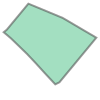

In [3]:
zipcode.loc[0,'geometry']

In [4]:
print(zipcode.loc[0, 'geometry'])

MULTIPOLYGON (((-86.684745973484 35.992792089723, -86.684905552598 35.992714171681, -86.685306705423 35.993144008254, -86.68566562245501 35.993538702146, -86.685987457926 35.993879807479, -86.686535946379 35.994411111402, -86.686611024104 35.994483835881, -86.686886503251 35.994716407217, -86.686768795928 35.994811634883, -86.685939048092 35.995811939437, -86.684617246684 35.995263431883, -86.68388061557999 35.994830268781, -86.68332882848 35.994505938039, -86.683892201609 35.993824758055, -86.68392490320601 35.993785216879, -86.68473134827801 35.99281011189, -86.68473108484299 35.992810107092, -86.684745973484 35.992792089723)))


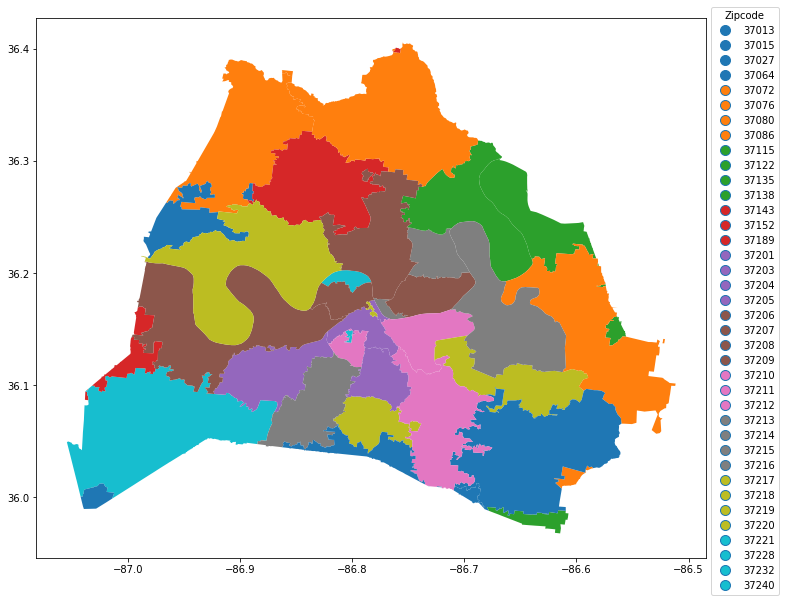

In [5]:
#geopandas handles legend styling if you pass a dict of keywords
leg_kwds = {'title': 'Zipcode', 'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}
zipcode.plot(column = 'zip', figsize=(12,12), legend = True,legend_kwds = leg_kwds)

plt.show()

In [6]:
policecalls2018= pd.read_csv('/Users/hari/NSSdatascience/GISdata/Metro_Nashville_Davidson_County_Calls_For_Police_Service__2018.csv')
policecalls2018.head()

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location,:@computed_region_wvby_4s8j
0,PD201800163050,02/13/2018 09:57:00 PM,20180145552,B,49,Vehicle Blocking Right of Way,P,PROGRESS,4,ASSISTED CITIZEN,1100.0,GARTLAND AV,215B,E,13,1241.0,36.179,-86.749,"(36.179, -86.749)",1.0
1,PD201800163353,02/13/2018 11:46:00 PM,20180145786,NaN,43,Want Officer for Investigation / Assistance,PM,REQUEST MNPD WITH MEDICAL RESPONSE,10,NO RESPONSE,0.0,N HILL ST,311C,S,11,8137.0,36.145,-86.760,"(36.145, -86.76)",1.0
2,PD201800162365,02/13/2018 06:56:00 PM,20180144888,B,15,Community Policing Activity,P,PROGRESS,15,COMMUNITY POLICING,0.0,CANNON ST & CLAIBORNE ST,5532,H,11,8209.0,36.151,-86.761,"(36.151, -86.761)",1.0
3,PD201800163904,02/14/2018 03:14:00 AM,20180146310,C,88,Investigate 911 Hang-Up Call,PW,REQUEST FOR PUBLIC WORKS,13,FALSE CALL,3900.0,SOUTHVIEW DR,621C,N,25,3149.0,36.211,-86.844,"(36.211, -86.844)",1.0
4,PD201800163522,02/14/2018 12:46:00 AM,20180145950,C,93,Traffic Violation,NaN,NaN,9,SUBJECT WARNED,0.0,GALLATIN PKE S & EMMITT AV,712C,M,11,1783.0,36.253,-86.717,"(36.253, -86.717)",1.0


In [7]:
#gdp_df = gdp_df.rename(columns = {'Country or Area':'Country','Year':'Year','Value': 'GDP_Per_Capita'})
policecalls2018_calls= policecalls2018.rename(columns={'Event Number':'Event_number', 'Call Received':'Call_Recieved','Tencode Description': 'description','Tencode Suffix Description':'response', 'Latitude':'lat','Longitude':'lng', 'Mapped Location': 'mapped_location'})

policecalls2018_calls['geometry'] = policecalls2018_calls.apply(lambda x: Point((float(x.lng), float(x.lat))), axis=1)
policecalls2018_calls.head()

,Event_number,Call_Recieved,Complaint Number,Shift,Tencode,description,Tencode Suffix,response,Disposition Code,Disposition Description,...,Street Name,Unit Dispatched,Sector,Zone,Reporting Area (RPA),lat,lng,mapped_location,:@computed_region_wvby_4s8j,geometry
0,PD201800163050,02/13/2018 09:57:00 PM,20180145552,B,49,Vehicle Blocking Right of Way,P,PROGRESS,4,ASSISTED CITIZEN,...,GARTLAND AV,215B,E,13,1241.0,36.179,-86.749,"(36.179, -86.749)",1.0,POINT (-86.749 36.179)
1,PD201800163353,02/13/2018 11:46:00 PM,20180145786,NaN,43,Want Officer for Investigation / Assistance,PM,REQUEST MNPD WITH MEDICAL RESPONSE,10,NO RESPONSE,...,N HILL ST,311C,S,11,8137.0,36.145,-86.760,"(36.145, -86.76)",1.0,POINT (-86.76000000000001 36.145)
2,PD201800162365,02/13/2018 06:56:00 PM,20180144888,B,15,Community Policing Activity,P,PROGRESS,15,COMMUNITY POLICING,...,CANNON ST & CLAIBORNE ST,5532,H,11,8209.0,36.151,-86.761,"(36.151, -86.761)",1.0,POINT (-86.76100000000001 36.151)
3,PD201800163904,02/14/2018 03:14:00 AM,20180146310,C,88,Investigate 911 Hang-Up Call,PW,REQUEST FOR PUBLIC WORKS,13,FALSE CALL,...,SOUTHVIEW DR,621C,N,25,3149.0,36.211,-86.844,"(36.211, -86.844)",1.0,POINT (-86.84399999999999 36.211)
4,PD201800163522,02/14/2018 12:46:00 AM,20180145950,C,93,Traffic Violation,NaN,NaN,9,SUBJECT WARNED,...,GALLATIN PKE S & EMMITT AV,712C,M,11,1783.0,36.253,-86.717,"(36.253, -86.717)",1.0,POINT (-86.71700000000001 36.253)


In [8]:
policecalls2018_calls = gpd.GeoDataFrame(policecalls2018_calls, crs = zipcode.crs, geometry = policecalls2018_calls['geometry'])


In [9]:
policecalls2018_calls_zipcode = gpd.sjoin(policecalls2018_calls, zipcode, op= 'within')
policecalls2018_calls_zipcode.head()


/Users/hari/anaconda3/envs/NSSdatascience/lib/python3.6/site-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


,Event_number,Call_Recieved,Complaint Number,Shift,Tencode,description,Tencode Suffix,response,Disposition Code,Disposition Description,...,lng,mapped_location,:@computed_region_wvby_4s8j,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
0,PD201800163050,02/13/2018 09:57:00 PM,20180145552,B,49,Vehicle Blocking Right of Way,P,PROGRESS,4,ASSISTED CITIZEN,...,-86.749,"(36.179, -86.749)",1.0,POINT (-86.749 36.179),17,37206,4,NASHVILLE,77142.743446754292,221891032.1496582
13,PD201800162447,02/13/2018 07:19:00 PM,20180144975,B,43,Want Officer for Investigation / Assistance,P,PROGRESS,4,ASSISTED CITIZEN,...,-86.740,"(36.168, -86.74)",1.0,POINT (-86.73999999999999 36.168),17,37206,4,NASHVILLE,77142.743446754292,221891032.1496582
31,PD201800163897,02/14/2018 03:08:00 AM,20180146342,C,43,Want Officer for Investigation / Assistance,P,PROGRESS,5,GONE ON ARRIVAL,...,-86.756,"(36.178, -86.756)",1.0,POINT (-86.756 36.178),17,37206,4,NASHVILLE,77142.743446754292,221891032.1496582
35,PD201800162840,02/13/2018 08:58:00 PM,20180145315,B,93,Traffic Violation,NaN,NaN,9,SUBJECT WARNED,...,-86.749,"(36.181, -86.749)",1.0,POINT (-86.749 36.181),17,37206,4,NASHVILLE,77142.743446754292,221891032.1496582
47,PD201800163718,02/14/2018 01:51:00 AM,20180146139,C,43,Want Officer for Investigation / Assistance,P,PROGRESS,4,ASSISTED CITIZEN,...,-86.748,"(36.184, -86.748)",1.0,POINT (-86.74799999999999 36.184),17,37206,4,NASHVILLE,77142.743446754292,221891032.1496582


In [10]:

policecalls2018_calls_zipcode[['zip', 'Call_Recieved','Event_number', 'description']].groupby('zip').agg('count').sort_values(by ='description', ascending = False)


,Call_Recieved,Event_number,description
zip,,,
37203,65640,65640,65640
37209,52552,52552,52552
37207,51825,51825,51825
37211,51505,51505,51505
37115,41698,41698,41698
37210,36958,36958,36958
37206,34306,34306,34306
37208,33756,33756,33756
37013,32309,32309,32309


In [11]:
zipcode_37232 = policecalls2018_calls_zipcode.loc[policecalls2018_calls_zipcode.zip == '37232']
zipcode_37232.head()


,Event_number,Call_Recieved,Complaint Number,Shift,Tencode,description,Tencode Suffix,response,Disposition Code,Disposition Description,...,lng,mapped_location,:@computed_region_wvby_4s8j,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
588,PD201800163187,02/13/2018 10:45:00 PM,20180145622,B,3,Administrative/Special Assignment,NaN,NaN,6,ASSISTED OTHER UNIT,...,-86.802,"(36.142, -86.802)",1.0,POINT (-86.80200000000001 36.142),9,37232,43,NASHVILLE,8942.7261830994048,2296994.4797363281
3300,PD201800166077,02/14/2018 05:21:00 PM,20180148453,B,46,Vehicle Accident - Personal Injury,R,REPORT,6,ASSISTED OTHER UNIT,...,-86.802,"(36.142, -86.802)",1.0,POINT (-86.80200000000001 36.142),9,37232,43,NASHVILLE,8942.7261830994048,2296994.4797363281
3541,PD201800167792,02/15/2018 03:56:00 AM,20180149765,C,71,Burglary - Non-Residence,A,ALARM,11,DISREGARD / SIGNAL 9,...,-86.801,"(36.139, -86.801)",1.0,POINT (-86.801 36.139),9,37232,43,NASHVILLE,8942.7261830994048,2296994.4797363281
3786,PD201800167208,02/15/2018 12:04:00 AM,20180149342,C,44,Disorderly Person,P,PROGRESS,5,GONE ON ARRIVAL,...,-86.801,"(36.139, -86.801)",1.0,POINT (-86.801 36.139),9,37232,43,NASHVILLE,8942.7261830994048,2296994.4797363281
4129,PD201800167350,02/15/2018 01:04:00 AM,20180149408,C,46,Vehicle Accident - Personal Injury,R,REPORT,11,DISREGARD / SIGNAL 9,...,-86.802,"(36.142, -86.802)",1.0,POINT (-86.80200000000001 36.142),9,37232,43,NASHVILLE,8942.7261830994048,2296994.4797363281


In [12]:
zipcode_37232_polygon = zipcode.loc[zipcode.zip == '37232']
type(zipcode_37232_polygon)

geopandas.geodataframe.GeoDataFrame

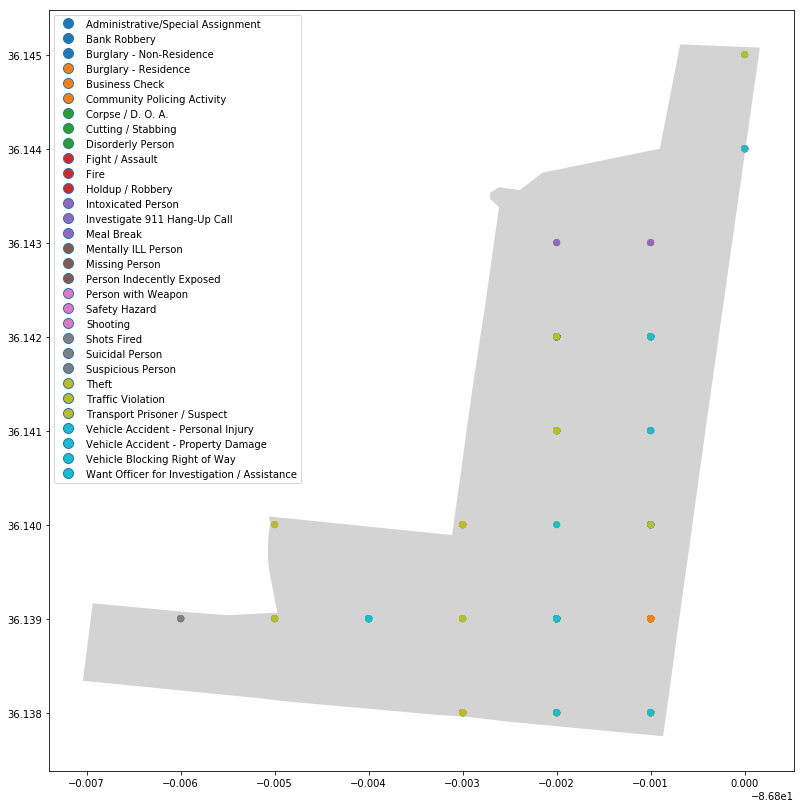

In [13]:
ax = zipcode_37232_polygon.plot(figsize = (14, 14), color = 'lightgrey')
zipcode_37232.plot( ax = ax, column = 'description', legend = True);
plt.show();

In [14]:
zipcode_37232_polygon.geometry.centroid

9    POINT (-86.80235642650986 36.14057031784123)
dtype: object

In [15]:
# find the center of the urban polygon wizipcode_37203_polygon.geometry.centroid
center = zipcode_37232_polygon.geometry.centroid

# get and store the first occurence which will be a Point geometry
center_point = center.iloc[0]

# print the types for center and center_point
print('center is :', type(center))
print('center_point is :', type(center_point))

center is : <class 'geopandas.geoseries.GeoSeries'>
center_point is : <class 'shapely.geometry.point.Point'>


In [16]:
# center point has longitude first
print(center_point)

# reverse the order when constructing the array for folium location
zipcode_37232_center = [center_point.y, center_point.x]

# check the order of urban_center, the location we'll set for our folium map
print(zipcode_37232_center)

POINT (-86.80235642650986 36.14057031784123)
[36.14057031784123, -86.80235642650986]


In [17]:
#create our map of Nashville and show it
map_downtown = folium.Map(location =  zipcode_37232_center, zoom_start = 15)
map_downtown

In [18]:
# for row in zipcode_37232.iterrows():
#     row_values = row[1]
#     print(row_values)

In [19]:
#draw zipcodes: description of police call and time of the call
folium.GeoJson(zipcode_37232_polygon).add_to(map_downtown)

#iterate through our urban art to create locations and markers for each piece
#here lat is listed first!!
#also the apostrophe in the 4th row causes problems!

for row in zipcode_37232.iterrows():
    row_values = row[1] 
    location = [row_values['lat'], row_values['lng']]
    popup = (str(row_values['Event_number']) + ': ' + 
             str(row_values['description']) + '<br/>' +
             str(row_values['Call_Recieved'])).replace("'", "`")
    marker = folium.Marker(location = location, popup = popup)
    
    marker.add_to(map_downtown)

#display our map
map_downtown

In [20]:
zipcode_37232 = policecalls2018_calls_zipcode.loc[policecalls2018_calls_zipcode.zip == '37232']
print(zipcode_37232.head(5))


        Event_number           Call_Recieved  Complaint Number Shift  Tencode  \
588   PD201800163187  02/13/2018 10:45:00 PM       20180145622     B        3   
3300  PD201800166077  02/14/2018 05:21:00 PM       20180148453     B       46   
3541  PD201800167792  02/15/2018 03:56:00 AM       20180149765     C       71   
3786  PD201800167208  02/15/2018 12:04:00 AM       20180149342     C       44   
4129  PD201800167350  02/15/2018 01:04:00 AM       20180149408     C       46   

                             description Tencode Suffix  response  \
588    Administrative/Special Assignment            NaN       NaN   
3300  Vehicle Accident - Personal Injury              R    REPORT   
3541            Burglary - Non-Residence              A     ALARM   
3786                   Disorderly Person              P  PROGRESS   
4129  Vehicle Accident - Personal Injury              R    REPORT   

      Disposition Code Disposition Description  ...     lng  \
588                  6     ASSISTED